In [62]:
%matplotlib inline

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
res=0.01
theta=np.arange(0,3*np.pi,res)
a=1  # parameter of log-spiral: r at theta=0
b=20*np.pi/180  # parameter of log-spiral: controls the pitch angle
alpha=np.arctan(1/b)  # constant angle between radial line and tangent to spiral 
pitch=np.pi/2 - alpha

pitch angle $p=\frac{\pi}{2}-\arctan\frac{1}{b}$

In [95]:
def logSpiralr(a,b,theta):
    # return r(theta), given the theta, for a logarithmic spiral
    return a*np.exp(b*theta)

In [96]:
def logSpiralt(a,b,r):
    # return theta(r), given the r, for a logarithmic spiral
    return (1.0/b)*np.log(r/a)

In [97]:
# the distance the CRE can propagate from arms due to finite lifetime in galaxy
# first the radial range
d=5.0
thetaRing=5*np.pi/2  # the azimuth of the arm at the radius of interest
circ=np.arange(0,2*np.pi,0.01)
ringCentre=np.zeros((np.size(circ)))
ringInner=np.zeros((np.size(circ)))
ringOuter=np.zeros((np.size(circ)))
ringCentre[:]=logSpiralr(a,b,thetaRing)  # the radius of interest
ringInner[:]=ringCentre-d
ringOuter[:]=ringCentre+d
# now the aximuthal range
# find the (r,theta) in radial range
thetaInner=logSpiralt(a,b,logSpiralr(a,b,thetaRing)-d)
thetaOuter=logSpiralt(a,b,logSpiralr(a,b,thetaRing)+d)
thetaRange=np.arange(thetaInner,thetaOuter,res)  # the azimuths of interest
rRange=logSpiralr(a,b,thetaRange)  # the radii of interest
# shift each phi by distance d along its radial circle
deltaTheta=np.zeros((np.size(thetaRange)))
for i in range(np.size(thetaRange)):
    deltaTheta[i]=d/rRange[i]

In [101]:
# define the envelope of the normal at each point
# first the outer envelope
thetaRangeOut=np.arange(np.pi,3*np.pi,res)# the azimuths of interest
rRangeOut=logSpiralr(a,b,thetaRangeOut)  # the radii of interest
rNormOut=np.zeros((np.size(rRangeOut)))
thetaNormOut=np.zeros((np.size(thetaRangeOut)))
for i in range(np.size(thetaRangeOut)):
    t1=thetaRangeOut[i]
    r1=rRangeOut[i]
    r2=np.sqrt(r1**2 + d**2 - 2*r1*d*np.cos(alpha+np.pi/2))
    t2=t1-np.arccos((r1**2 + r2**2 - d**2)/(2*r1*r2))  # t1- because of spiral winding direction
    rNormOut[i]=r2
    thetaNormOut[i]=t2

# now the inner envelope (the azimuthal range is different)
thetaRangeIn=np.arange(np.pi,3*np.pi,res)# the azimuths of interest
rRangeIn=logSpiralr(a,b,thetaRangeIn)  # the radii of interest
rNormIn=np.zeros((np.size(rRangeIn)))
thetaNormIn=np.zeros((np.size(thetaRangeIn)))
for i in range(np.size(thetaRangeIn)):
    t1=thetaRangeIn[i]
    r1=rRangeIn[i]
    r2=np.sqrt(r1**2 + d**2 - 2*r1*d*np.cos(np.pi/2 - alpha))
    t2=t1+np.arccos((r1**2 + r2**2 - d**2)/(2*r1*r2))  # t1+ because of spiral winding direction
    rNormIn[i]=r2
    thetaNormIn[i]=t2

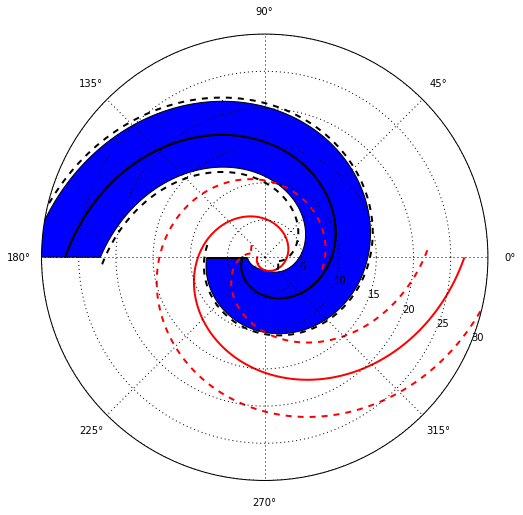

In [109]:
lw=2
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111, projection='polar')
ax.plot(thetaRangeOut,logSpiralr(a,b,thetaRangeOut),'k', linewidth=lw)
ax.plot(theta-np.pi,logSpiralr(a,b,theta),'r', linewidth=lw)
#ax.plot(circ,ringCentre,'k',linewidth=lw)
#ax.plot(circ,ringInner,'--k',linewidth=lw)
#ax.plot(circ,ringOuter,'--k',linewidth=lw)
ax.fill_between(thetaRangeOut,logSpiralr(a,b,thetaRangeOut), rNormOut, facecolor='b')
ax.fill_between(thetaRangeIn, rNormIn,logSpiralr(a,b,thetaRangeIn), facecolor='b')
ax.plot(thetaNormOut,rNormOut,'--k',linewidth=lw)
ax.plot(thetaNormIn,rNormIn,'--k',linewidth=lw)
ax.plot(thetaNormOut-np.pi,rNormOut,'--r',linewidth=lw)
ax.plot(thetaNormIn-np.pi,rNormIn,'--r',linewidth=lw)
#ax.plot(thetaRange-deltaTheta,rRange,'--b',linewidth=lw)
#ax.plot(thetaRange+deltaTheta,rRange,'--b',linewidth=lw)
#ax.plot(thetaRange-deltaTheta-np.pi,rRange,'--r',linewidth=lw)
#ax.plot(thetaRange+deltaTheta-np.pi,rRange,'--r',linewidth=lw)
ax.set_rmax(30)
#ax.set_rticks([])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True,linewidth=lw/2)
plt.show()